In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_phone = pd.read_csv('phone.csv')

In [3]:
# Joimimg the data together
from functools import reduce

dfs = [df_contract, df_internet, df_phone]
df = reduce(lambda left,right: pd.merge(left,right,on='customerID', how='outer'), dfs)

In [4]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d', errors='coerce')

In [5]:
#Generating the rarget column
df['Target'] = df['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1) 


In [6]:
df['Internet'] = df['InternetService'].apply(lambda x: "No" if pd.isna(x) else "Yes") 

In [7]:
df['Mobile'] = df['MultipleLines'].apply(lambda x: "No" if pd.isna(x) else "Yes") 

In [8]:
def conditions(df):
    if (df['Internet'] =="Yes") and(df['Mobile'] =="Yes") :
        return "Both"
    else:
        if df['Internet'] =="Yes":
            return "Internet"
        else:
            return "Mobile"

In [9]:
df['Internet_and_Mobile'] = df.apply(conditions, axis=1)
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target,Internet,Mobile,Internet_and_Mobile
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN,0,Yes,No,Internet
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No,0,Yes,Yes,Both
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No,1,Yes,Yes,Both
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN,0,Yes,No,Internet
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No,1,Yes,Yes,Both


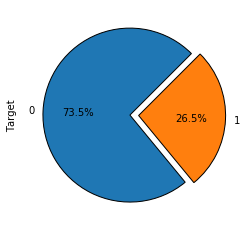

In [10]:
df['Target'].value_counts().plot.pie(startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.1))

In [11]:
active = df[df["Target"]==0]
active['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [12]:
disconected = df[df["Target"]==1]
disconected['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

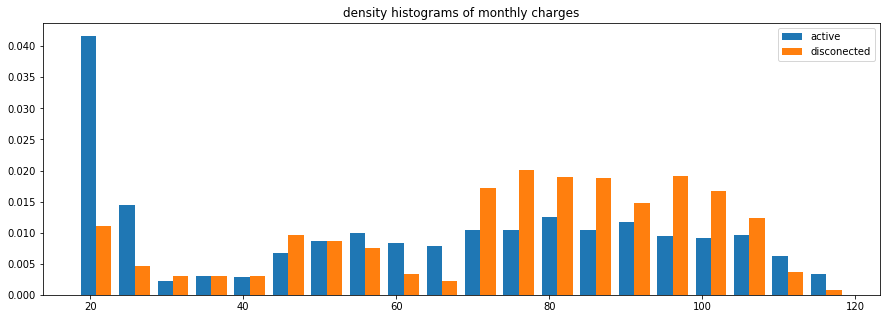

In [13]:
#plot histograms of `MonthlyCharges` for both groups
plt.figure(figsize=(15,5))
plt.hist([active['MonthlyCharges'], disconected['MonthlyCharges']], label=['active', 'disconected'], 
         bins=20, density=True)
plt.title('density histograms of monthly charges')
plt.legend()


The custumers that left paid more, perhaps they wernt happy with the price they paid

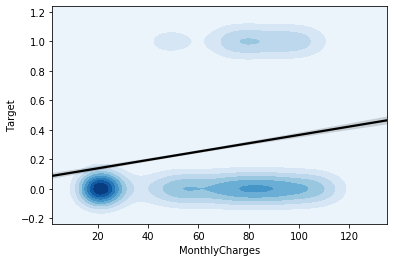

In [14]:
fig = sns.kdeplot(df.MonthlyCharges, df.Target,cmap="Blues", shade=True)
fig = sns.regplot(df.MonthlyCharges, df.Target, scatter=False,color = 'black')
#plt.xlabel('Age', fontsize=16)
#plt.ylabel('Probability', fontsize=16)
#plt.suptitle('Age Vs Probability for Normal diagnosis', fontsize=20)
#plt.savefig('Age vs Proba.png',bbox_inches = "tight")


Again the correlation between price and leaving can be seen here

# Phone_and_Internet

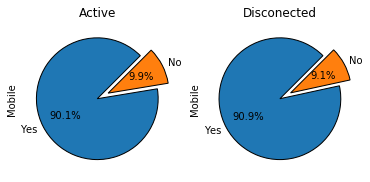

In [15]:
plt.subplot(1, 2, 1)
active['Mobile'].value_counts().plot.pie(title = 'Active',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2))
plt.subplot(1, 2, 2)
disconected['Mobile'].value_counts().plot.pie(title = 'Disconected',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2))


I see no big differebce here,This is probably not why clients leave

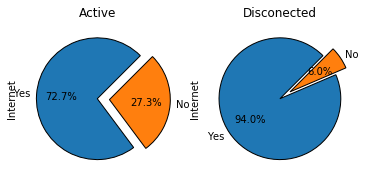

In [16]:
plt.subplot(1, 2, 1)
active['Internet'].value_counts().plot.pie(title = 'Active',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2))
plt.subplot(1, 2, 2)
disconected['Internet'].value_counts().plot.pie(title = 'Disconected',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2))


Most of the disconected had internet, perhaps people werent happy with the internet services/quality

plt.tight_layout()
plt.subplot(1, 2, 1)
active['Internet_and_Mobile'].value_counts().plot.pie(title = 'Active',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2,0.2))
plt.subplot(1, 2, 2)
disconected['Internet_and_Mobile'].value_counts().plot.pie(title = 'Disconected',startangle=45,  wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', explode=(0, 0.2,0.2))


Text(0.5, 1.0, 'Disconected')

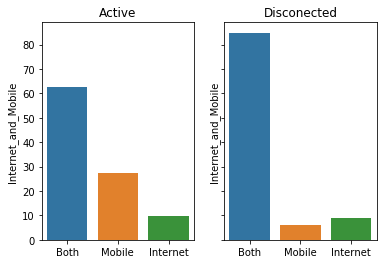

In [72]:
dis  = 100*disconected['Internet_and_Mobile'].value_counts()/len(disconected)
act = 100*active['Internet_and_Mobile'].value_counts()/len(active)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(act.index, act,order = ['Both','Mobile','Internet'], ax=ax1)
ax1.set_title('Active')
sns.barplot(dis.index, dis,order = ['Both','Mobile','Internet'], ax = ax2)

ax2.set_title('Disconected')

In [89]:
active.groupby('Internet_and_Mobile', as_index=False)['MonthlyCharges'].mean()

,Internet_and_Mobile,MonthlyCharges
0,Both,81.513620
1,Internet,43.520996
2,Mobile,21.136058


In [85]:
disconected.groupby('Internet_and_Mobile', as_index=False)['MonthlyCharges'].mean()

,Internet_and_Mobile,MonthlyCharges
0,Both,82.250000
1,Internet,37.533824
2,Mobile,20.368142


# Conclusions

- the active:disconected ratio  is ~ 2.7:1
- the leaving clients pay more 
- relativly high percentage of active clients pay the minimal sum 
- The share of clients that used internet and left was relatively high

